In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sweetviz as sv
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 50 Startups

In [9]:
df = pd.read_csv("D:\\Data Science\\Data Science Assignment\\Multi Linear Regression\\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Insights and Visualization

In [10]:
df.rename(columns={'R&D Spend' : 'Research', 'Marketing Spend' : 'Marketing'},inplace=True)
df.head()

,Research,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Research        50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
df.describe()

,Research,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
df.isna().sum()

Research          0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

In [14]:
df.duplicated().sum()

0

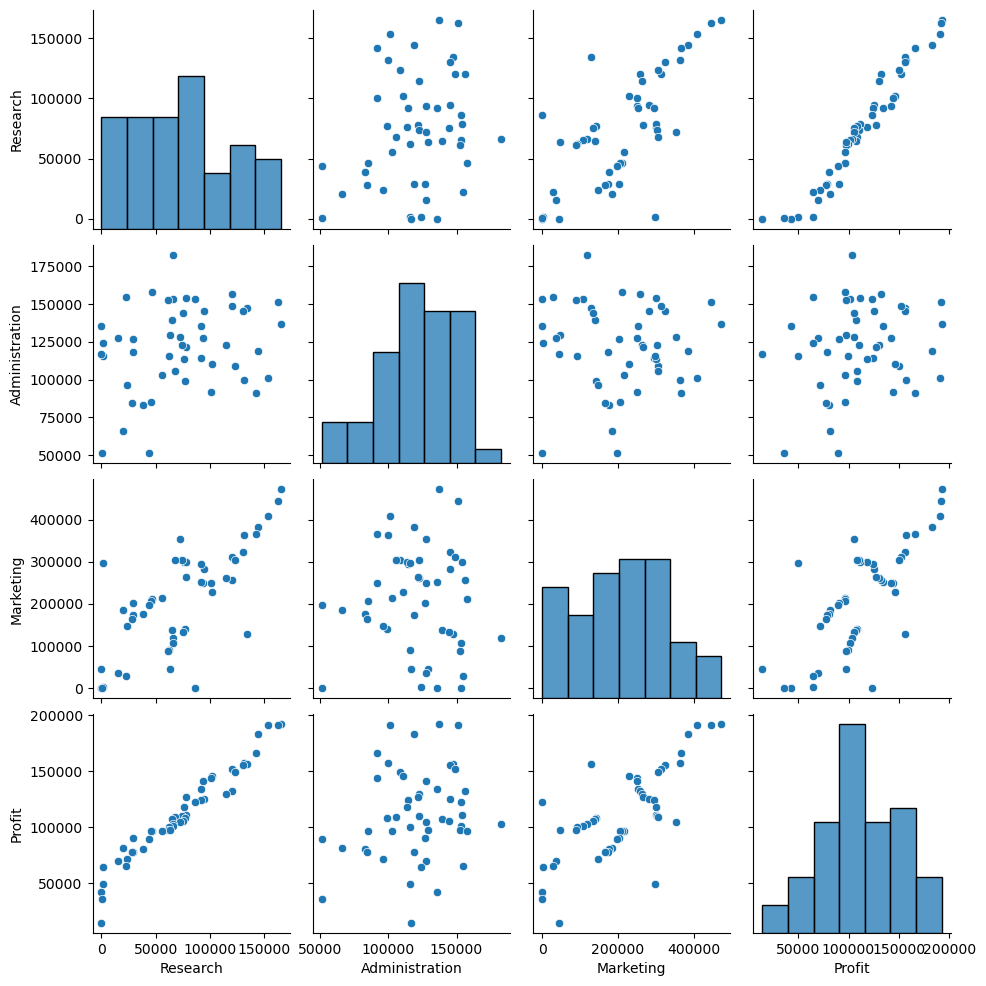

In [15]:
sns.pairplot(df)

### Correlation Analysis

In [16]:
df.corr()

,Research,Administration,Marketing,Profit
Research,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

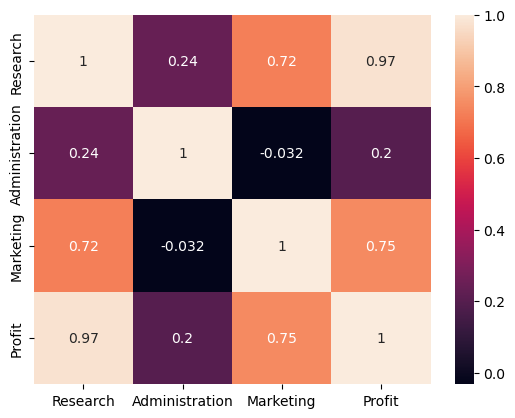

In [17]:
sns.heatmap(df.corr(), annot=True)

### Model 1 (Basic)

In [18]:
import statsmodels.formula.api as smf

In [19]:
model = smf.ols('Profit~ Research+Administration+Marketing', data =df).fit()
model

In [20]:
model.params

Intercept         50122.192990
Research              0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        01:23:59   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Research           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Pvalues for  Administration and Marketing show that they are insignificant.

In [24]:
model.tvalues, model.pvalues

(Intercept          7.626218
 Research          17.846374
 Administration    -0.525507
 Marketing          1.655077
 dtype: float64,
 Intercept         1.057379e-09
 Research          2.634968e-22
 Administration    6.017551e-01
 Marketing         1.047168e-01
 dtype: float64)

In [25]:
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [26]:
# Administration
model_admn = smf.ols('Profit~ Administration', data =df).fit()
model_admn.tvalues, model_admn.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [27]:
model_admn.rsquared, model_admn.rsquared_adj

(0.04028714077757245, 0.020293122877105274)

In [28]:
# Marketing
model_mar = smf.ols('Profit~ Marketing', data =df).fit()
model_mar.tvalues, model_mar.pvalues

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

In [29]:
model_mar.rsquared, model_mar.rsquared_adj

(0.5591535746115515, 0.5499692740826254)

In [30]:
#  Marketing +  Administration
model_admn_mar = smf.ols('Profit~ Administration + Marketing', data =df).fit()
model_admn_mar.tvalues, model_admn_mar.pvalues

(Intercept         1.142741
 Administration    2.467779
 Marketing         8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 Marketing         9.727245e-11
 dtype: float64)

In [31]:
model_admn_mar.rsquared, model_admn_mar.rsquared_adj

(0.6097229746770663, 0.593115441684601)

### Model Validation

### 1. Collinearity check

VIF = 1/(1-Rsquare)

In [32]:
df.columns

Index(['Research', 'Administration', 'Marketing', 'State', 'Profit'], dtype='object')

In [33]:
rsq_research = smf.ols('Research ~ Administration + Marketing ', data=df).fit().rsquared
vif_research = 1/(1-rsq_research)

rsq_administration = smf.ols(' Administration ~  Research + Marketing ', data=df).fit().rsquared
vif_administration = 1/(1-rsq_administration)

rsq_marketing = smf.ols(' Marketing ~  Research + Administration ', data=df).fit().rsquared
vif_marketing = 1/(1-rsq_marketing)

vif = {'Variables' : ['Research', 'Administration', 'Marketing'], 'vif' : [vif_research, vif_administration, vif_marketing ]}
vif_df = pd.DataFrame(vif)
vif_df

,Variables,vif
0,Research,2.468903
1,Administration,1.175091
2,Marketing,2.326773


In [34]:
# no vif > 20. Hence, no collinearity.

### 2. Residual Analysis

#### Normality of Residuals (Q-Q plot)

In [35]:
import statsmodels.api as sm

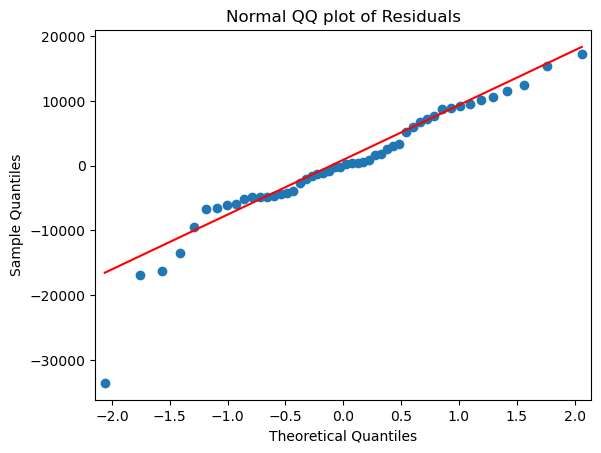

In [36]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal QQ plot of Residuals')
plt.show()

In [37]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

### Residual Plot for Homoscedasticity

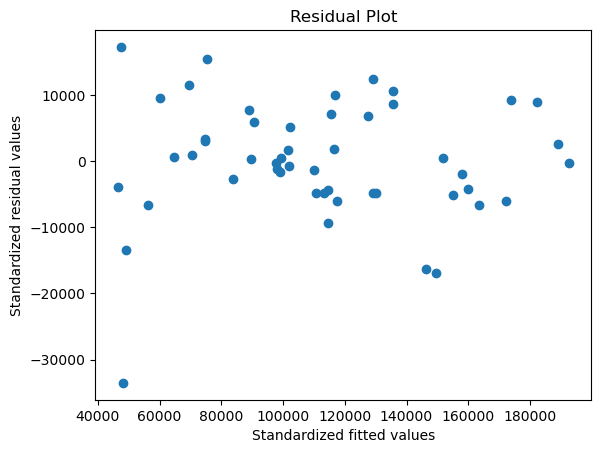

In [38]:
plt.scatter((model.fittedvalues), (model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

Outliers are visible

### Residual vs Regressors

eval_env: 1


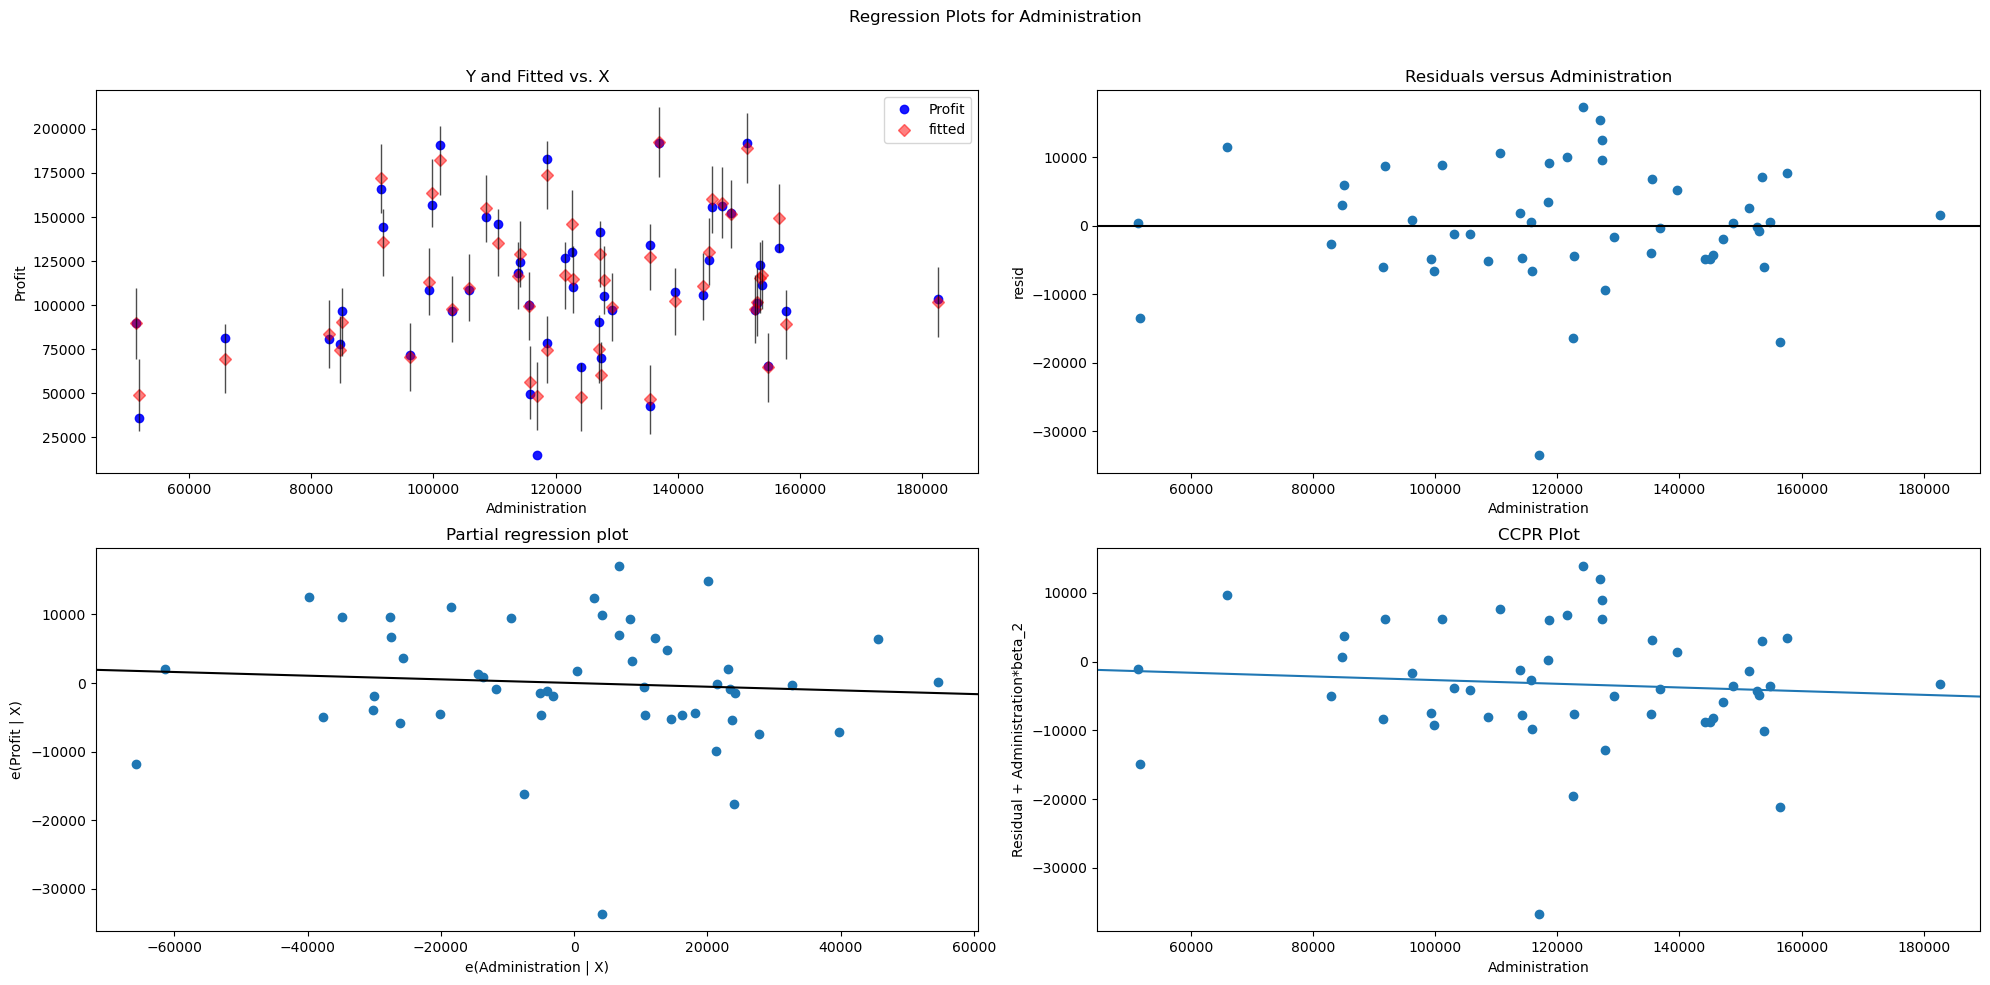

In [39]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'Administration', fig= figure)
plt.show()

eval_env: 1


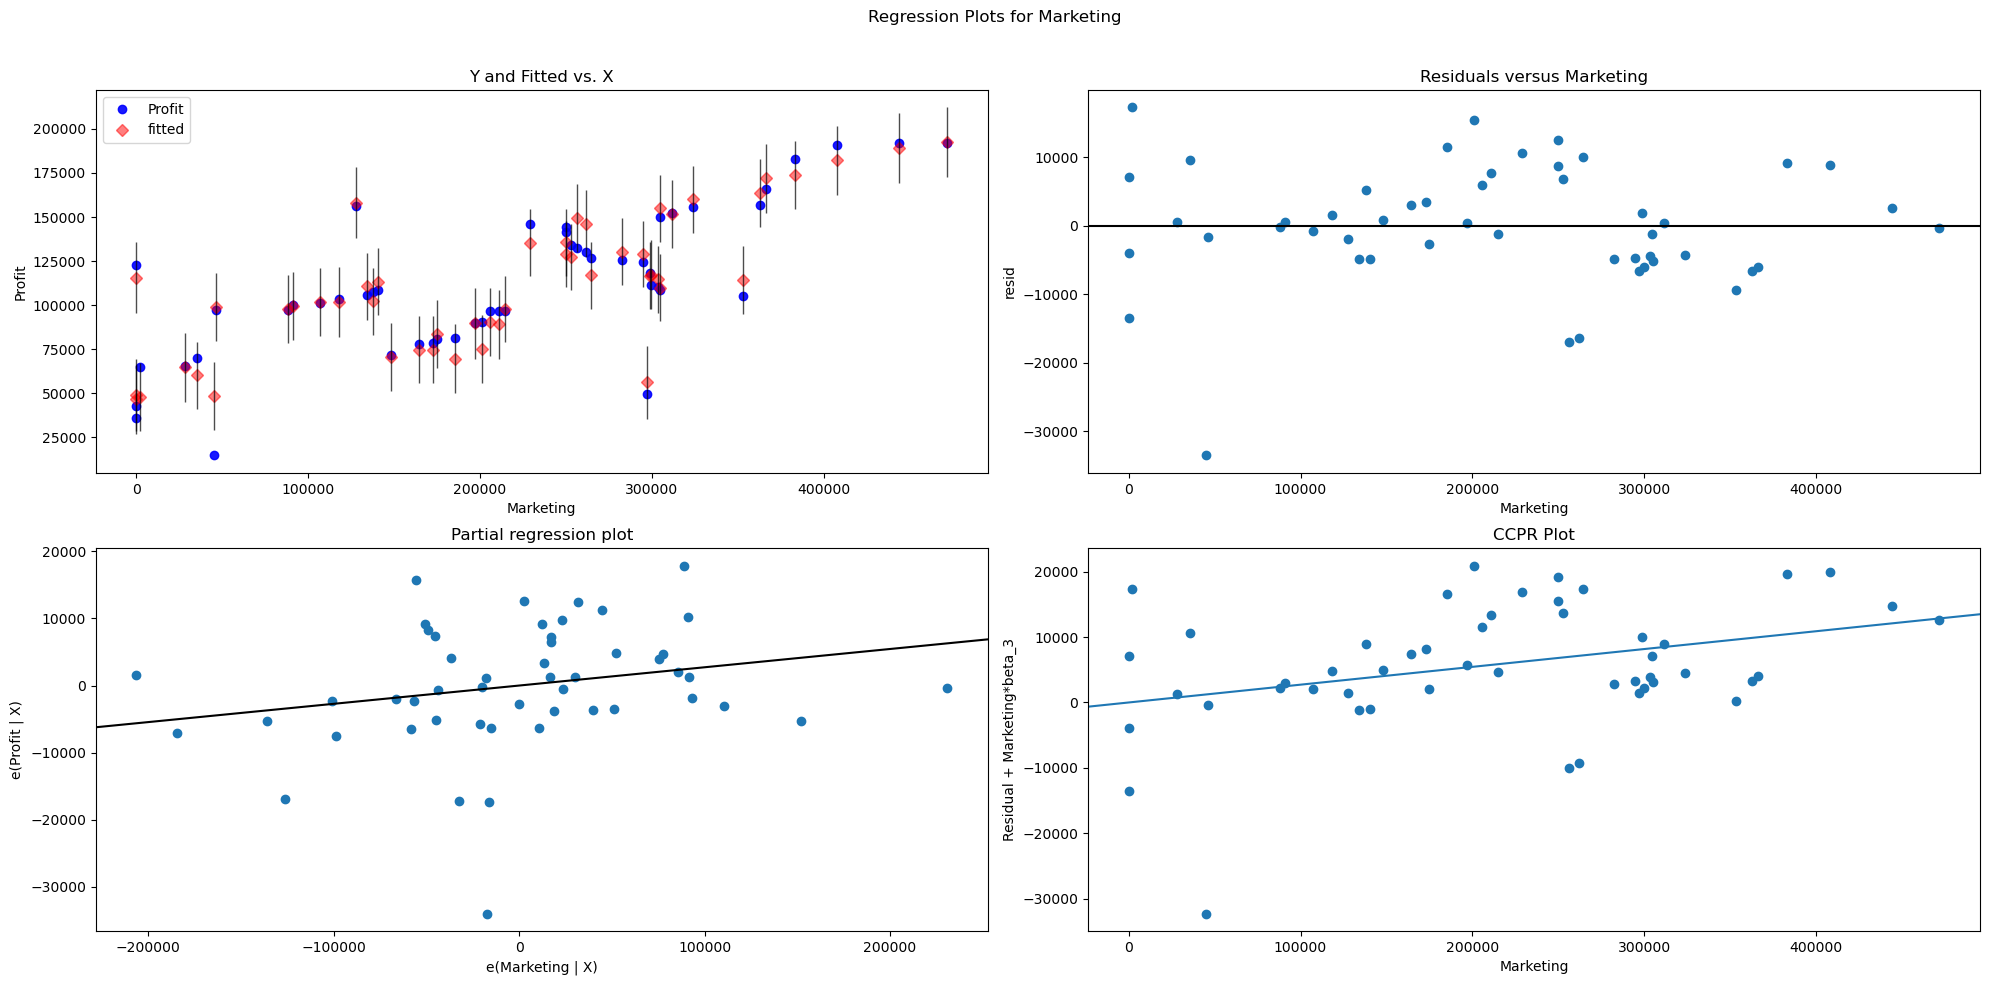

In [40]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'Marketing', fig= figure)
plt.show()

eval_env: 1


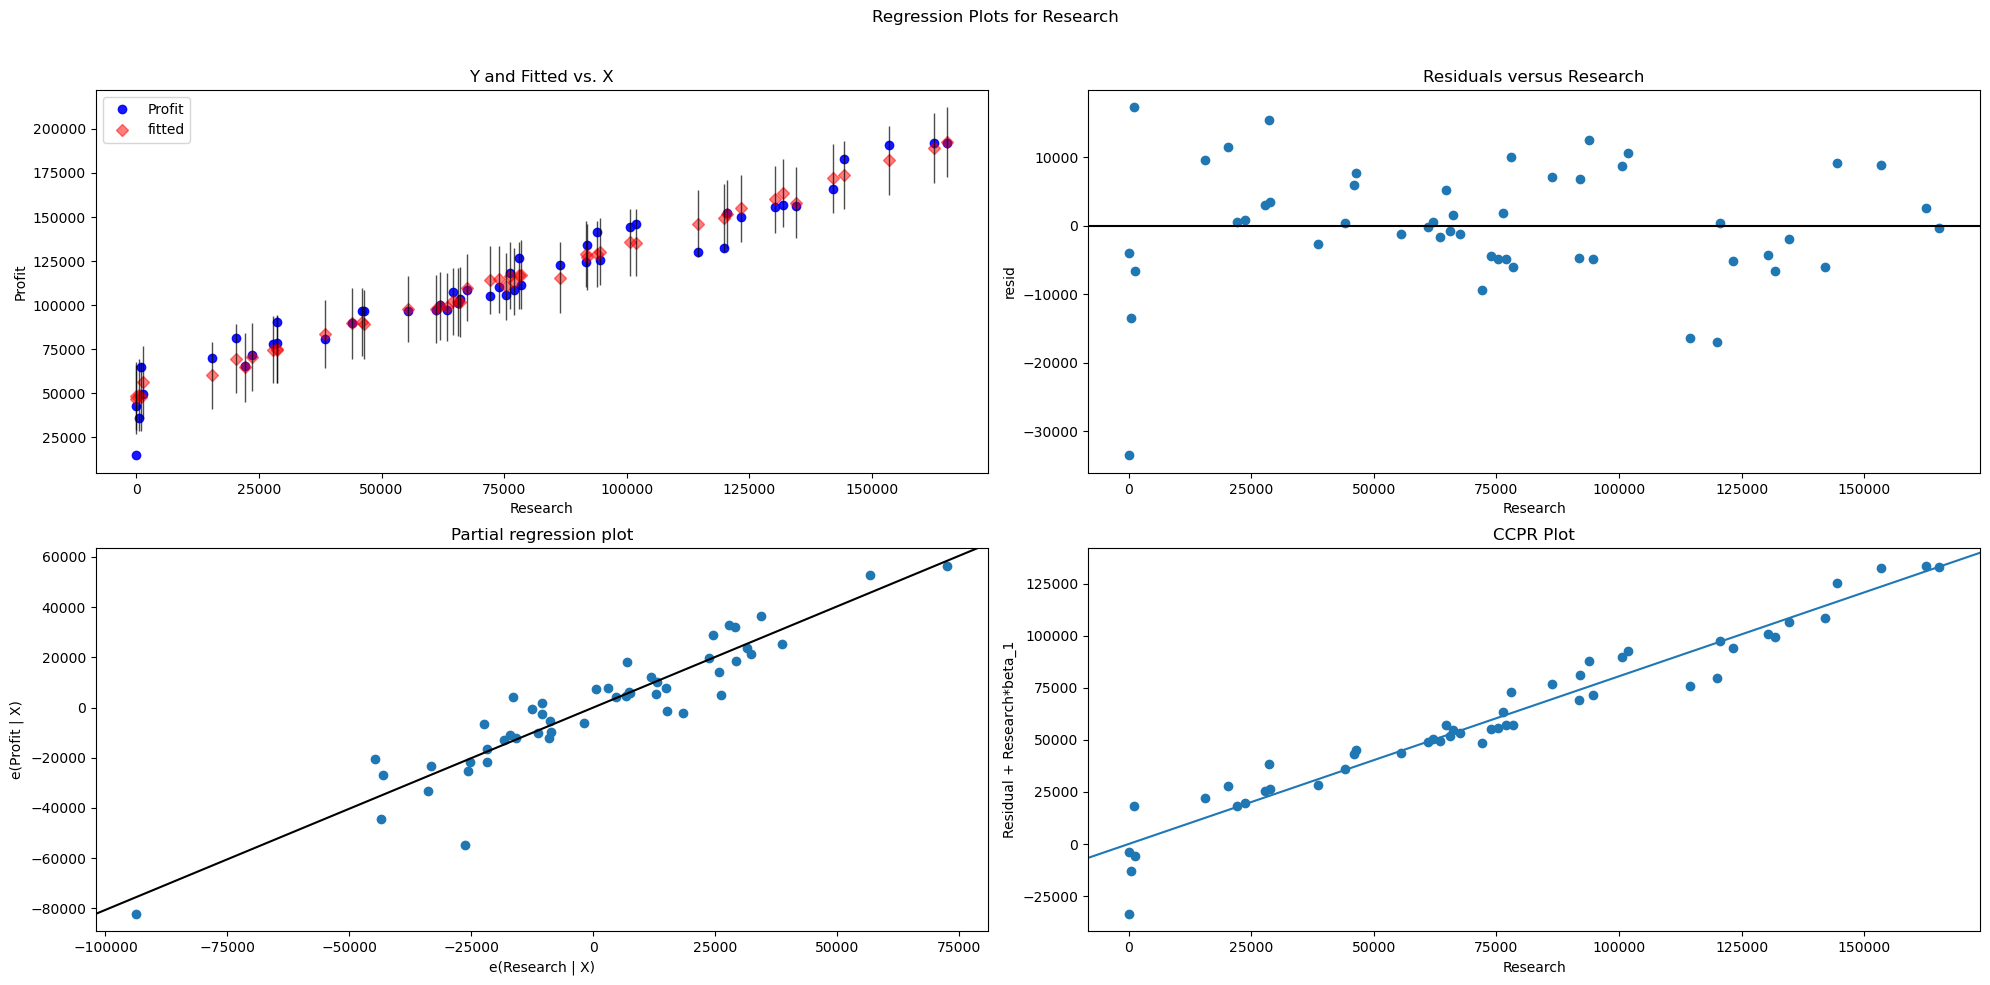

In [41]:
figure = plt.figure(figsize=(20,10))
sm.graphics.plot_regress_exog(model, 'Research', fig= figure)
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)

### 1. Cook's Distance

In [42]:
influencers = model.get_influence()
(a,_)= influencers.cooks_distance

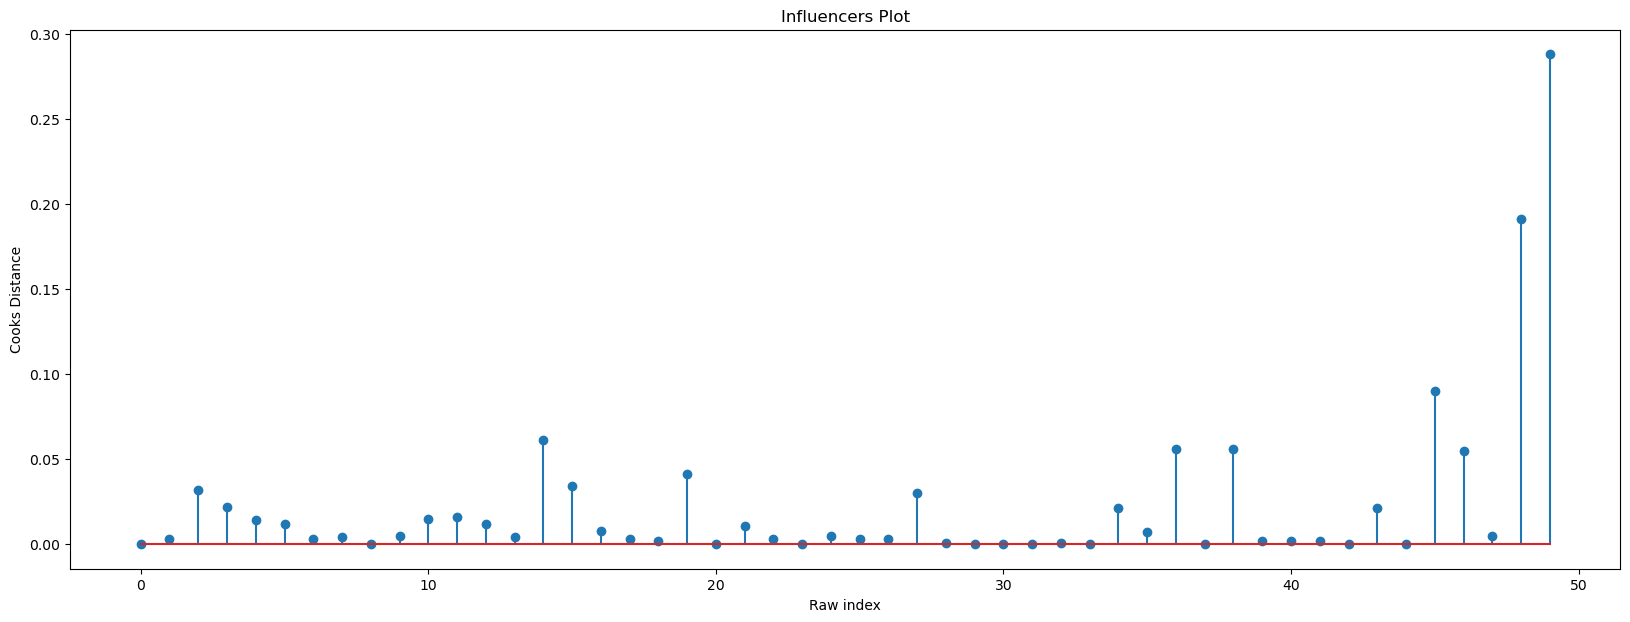

In [43]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)),np.round(a,3))
plt.title('Influencers Plot')
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [44]:
np.argmax(a) , np.max(a)

(49, 0.28808229275432634)

### 2. High Influence Point

In [45]:
from statsmodels.graphics.regressionplots import influence_plot

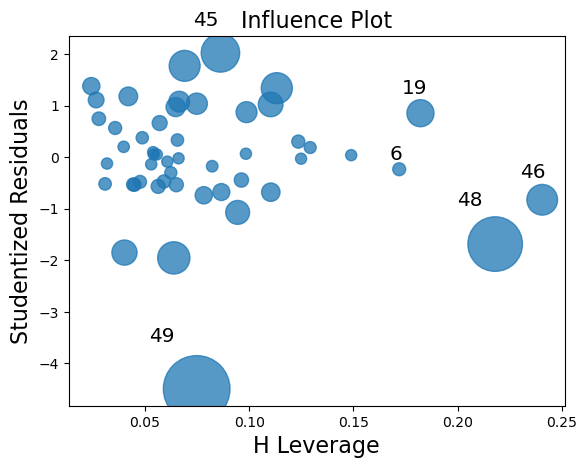

In [46]:
influence_plot(model)
plt.show()

In [47]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [48]:
leverage_cutoff

0.36

#### Conclusion

Outlier datapoint = Row 49th

### Model 2 (Deleting the state column)

In [49]:
df2 = df.copy()

In [50]:
df2 = df2.drop(columns='State', axis=1)

In [51]:
model2 = smf.ols('Profit~ Research+Administration+Marketing', data =df2).fit()
model2

In [52]:
model2.params

Intercept         50122.192990
Research              0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [53]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           4.53e-30
Time:                        01:33:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Research           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No change observed in the R_squared value.

Hence, no increase in accuracy after deleting State column.

### Model 3 (Deleting the 49th row)

In [54]:
df3 = df.copy()

In [55]:
df3 = df3.drop(df3.index[[49]], axis=0)

In [56]:
df3.tail()

,Research,Administration,Marketing,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [57]:
model3 = smf.ols('Profit~ Research+Administration+Marketing', data =df3).fit()
model3

In [58]:
model3.params

Intercept         52382.439251
Research              0.783002
Administration       -0.022201
Marketing             0.025234
dtype: float64

In [59]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           8.85e-32
Time:                        01:35:32   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
Research           0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing          0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Conclusion

The R squared value has been increased to 96.1%. Hence, model 3 is more accurate and is used for prediction.

#### Predicting new data

In [60]:
new_data = pd.DataFrame({'Research':150000, "Administration": 100000, "Marketing":900000}, index = [1])
new_data

,Research,Administration,Marketing
1,150000,100000,900000


In [61]:
model3.predict(new_data)

1    190322.845555
dtype: float64

### Comparing the Rsquared values

In [62]:
t = {'Model' : ['model', 'model2', 'model3'], 'Rsquared' : [model.rsquared,model2.rsquared,model3.rsquared ]}
table = pd.DataFrame(t)
table

,Model,Rsquared
0,model,0.950746
1,model2,0.950746
2,model3,0.961316


### End